In [1]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

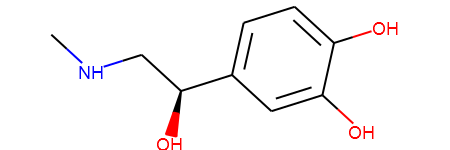

In [2]:
epinephrine = Chem.MolFromSmiles('CNC[C@H](O)c1ccc(O)c(O)c1')
epinephrine

## Morgan Bits

In [3]:
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(epinephrine, radius=2, bitInfo=bi)
# show 10 of the set bits:
list(fp.GetOnBits())[:10]

[1, 80, 227, 315, 589, 606, 632, 807, 875, 1057]

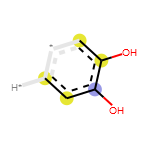

In [4]:
Draw.DrawMorganBit(epinephrine,589,bi)

* The molecule fragment is drawn with the atoms in the same positions as in the original molecule.
* The central atom is highlighted in blue.
* Aromatic atoms are highlighted in yellow
* Aliphatic ring atoms (none present here) are highlighted in dark gray
* Atoms/bonds that are drawn in light gray indicate pieces of the structure that influence the atoms' connectivity invariants but that are not directly part of the fingerprint.

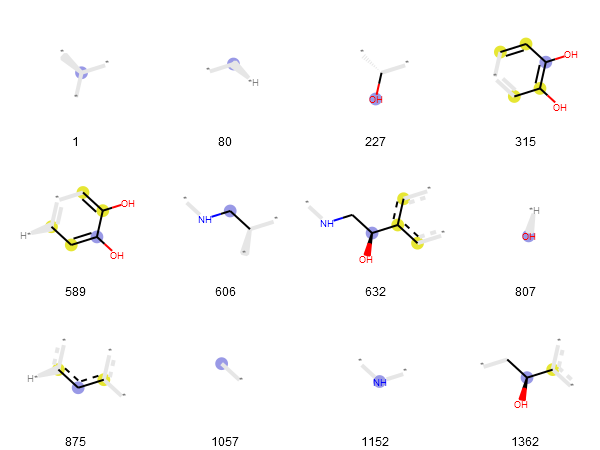

In [5]:
tpls = [(epinephrine,x,bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(tpls[:12],molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()][:12])

In [6]:
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))

In [7]:
interact(renderFpBit, bitIdx=list(bi.keys()),mol=fixed(epinephrine),
         bitInfo=fixed(bi),fn=fixed(Draw.DrawMorganBit));

interactive(children=(Dropdown(description='bitIdx', options=(1, 80, 227, 315, 589, 606, 632, 807, 875, 1057, …

## RDKit Bits

In [8]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(epinephrine, maxPath=5, bitInfo=rdkbi)
# show 10 of the set bits:
list(rdkfp.GetOnBits())[:10]

[93, 103, 112, 122, 148, 149, 161, 166, 194, 208]

In [9]:
print(rdkfp.GetNumOnBits(),len(rdkbi))

128 128


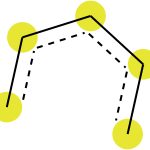

In [10]:
Draw.DrawRDKitBit(epinephrine,103,rdkbi)

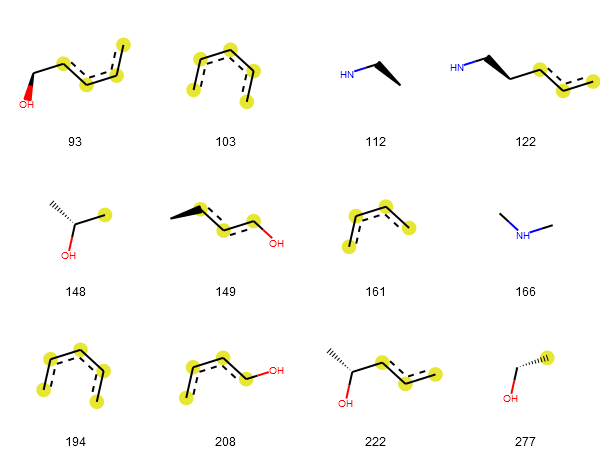

In [11]:
tpls = [(epinephrine,x,rdkbi) for x in rdkbi]
Draw.DrawRDKitBits(tpls[:12],molsPerRow=4,legends=[str(x) for x in rdkbi][:12])

* The molecule fragment is drawn with the atoms in the same positions as in the original molecule.
* All bonds that are drawn are part of the bit.
* Aromatic atoms are highlighted in yellow
* By default there is no additional highlighting for aliphatic ring atoms, but this can be changed using the nonAromaticColor optional argument.

In [12]:
interact(renderFpBit, bitIdx=list(rdkbi.keys()),mol=fixed(epinephrine),
         bitInfo=fixed(rdkbi),fn=fixed(Draw.DrawRDKitBit));

interactive(children=(Dropdown(description='bitIdx', options=(93, 103, 112, 122, 148, 149, 161, 166, 194, 208,…